In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/Google_Drive")

Mounted at /content/Google_Drive


In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/Google_Drive/MyDrive/PotatoDisease/PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


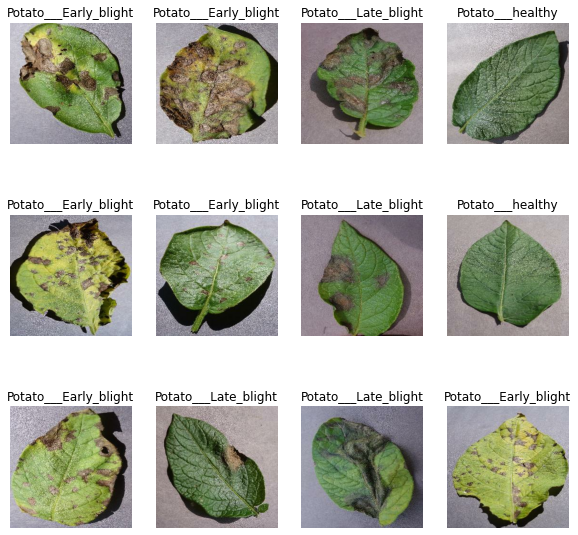

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
class_names = dataset.class_names

In [ ]:
def get_dataset_partitions(ds, train_split, test_split, val_split):
  ds = ds.shuffle(10000, seed = 12)
  ds_size = len(ds)
  train_size = int(ds_size * train_split)
  test_size = int(ds_size * test_split)
  val_size = int(ds_size * val_split)
  train_data = ds.take(train_size)
  test_data = ds.skip(train_size).take(test_size)
  val_data = ds.skip(train_size).skip(test_size)
  return train_data, test_data, val_data

In [ ]:
train_ds, test_ds, val_ds = get_dataset_partitions(dataset, 0.8, 0.1, 0.1)

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), input_shape = (32, IMAGE_SIZE, IMAGE_SIZE, 3) , activation = 'relu'),
    layers.MaxPooling2D((2,2),),
    layers.Conv2D(64, (3, 3), input_shape = (32, IMAGE_SIZE, IMAGE_SIZE, 3) , activation = 'relu'),
    layers.MaxPooling2D((2,2),),
    layers.Conv2D(64, (3, 3), input_shape = (32, IMAGE_SIZE, IMAGE_SIZE, 3) , activation = 'relu'),
    layers.MaxPooling2D((2,2),),
    layers.Conv2D(64, (3, 3), input_shape = (32, IMAGE_SIZE, IMAGE_SIZE, 3) , activation = 'relu'),
    layers.MaxPooling2D((2,2),),
    layers.Conv2D(64, (3, 3), input_shape = (32, IMAGE_SIZE, IMAGE_SIZE, 3) , activation = 'relu'),
    layers.MaxPooling2D((2,2),),
    layers.Conv2D(64, (3, 3), input_shape = (32, IMAGE_SIZE, IMAGE_SIZE, 3) , activation = 'relu'),
    layers.MaxPooling2D((2,2),),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(3, activation = 'softmax')

])

In [ ]:
model.build(input_shape = (32, IMAGE_SIZE, IMAGE_SIZE, 3))

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50
)

Epoch 1/50
54/54 [==============================] - 290s 2s/step - loss: 11.2049 - accuracy: 0.5752 - val_loss: 0.5545 - val_accuracy: 0.7773
Epoch 2/50
54/54 [==============================] - 83s 2s/step - loss: 0.4629 - accuracy: 0.8333 - val_loss: 0.3201 - val_accuracy: 0.8672
Epoch 3/50
54/54 [==============================] - 83s 2s/step - loss: 0.3579 - accuracy: 0.8519 - val_loss: 0.4093 - val_accuracy: 0.8477
Epoch 4/50
54/54 [==============================] - 82s 2s/step - loss: 0.3229 - accuracy: 0.8709 - val_loss: 0.1609 - val_accuracy: 0.9375
Epoch 5/50
54/54 [==============================] - 84s 2s/step - loss: 0.1993 - accuracy: 0.9265 - val_loss: 0.3530 - val_accuracy: 0.8438
Epoch 6/50
54/54 [==============================] - 82s 2s/step - loss: 0.2449 - accuracy: 0.9109 - val_loss: 0.2960 - val_accuracy: 0.8867
Epoch 7/50
54/54 [==============================] - 83s 2s/step - loss: 0.2205 - accuracy: 0.9126 - val_loss: 0.3015 - val_accuracy: 0.8984
Epoch 8/50
54/54 [

In [ ]:
scores = model.evaluate(test_ds)

6/6 [==============================] - 0s 26ms/step - loss: 0.0280 - accuracy: 0.9896
